In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [2]:
np.random.seed(42)

SIZE=256
img_data=[]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


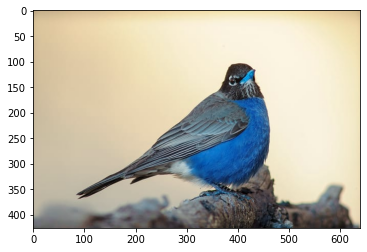

In [4]:
img=cv2.imread('/content/drive/MyDrive/bird.jpg', 1)   #Change 1 to 0 for grey images
imshow(img)

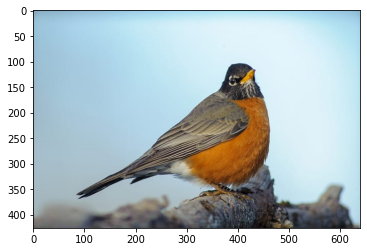

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
imshow(img)

In [6]:

img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

In [7]:
img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [9]:


model.add(MaxPooling2D((2, 2), padding='same'))

In [10]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

In [11]:

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 8)        0

In [13]:
model.fit(img_array, img_array,
        epochs=50,
        shuffle=True)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.5498 - accuracy: 0.6720
Epoch 2/50
1/1 [==============================] - 0s 210ms/step - loss: 0.5285 - accuracy: 0.2207
Epoch 3/50
1/1 [==============================] - 0s 209ms/step - loss: 0.4977 - accuracy: 0.2115
Epoch 4/50
1/1 [==============================] - 0s 213ms/step - loss: 0.4536 - accuracy: 0.1951
Epoch 5/50
1/1 [==============================] - 0s 224ms/step - loss: 0.3940 - accuracy: 0.1892
Epoch 6/50
1/1 [==============================] - 0s 206ms/step - loss: 0.3184 - accuracy: 0.1893
Epoch 7/50
1/1 [==============================] - 0s 210ms/step - loss: 0.2311 - accuracy: 0.1903
Epoch 8/50
1/1 [==============================] - 0s 203ms/step - loss: 0.1400 - accuracy: 0.1984
Epoch 9/50
1/1 [==============================] - 0s 207ms/step - loss: 0.0654 - accuracy: 0.1958
Epoch 10/50
1/1 [==============================] - 0s 204ms/step - loss: 0.0497 - accuracy: 0.1944
Epoch 11/50
1/1 [=====

In [14]:

print("Neural network output")
pred = model.predict(img_array)

Neural network output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


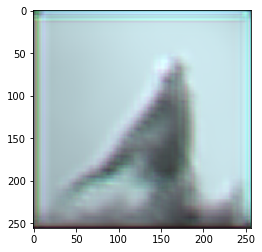

In [15]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

In [16]:
model.fit(img_array, img_array,
        epochs=500,
        shuffle=True)

Epoch 1/500
1/1 [==============================] - 0s 214ms/step - loss: 0.0176 - accuracy: 0.6798
Epoch 2/500
1/1 [==============================] - 0s 205ms/step - loss: 0.0174 - accuracy: 0.6764
Epoch 3/500
1/1 [==============================] - 0s 224ms/step - loss: 0.0169 - accuracy: 0.6767
Epoch 4/500
1/1 [==============================] - 0s 208ms/step - loss: 0.0162 - accuracy: 0.6754
Epoch 5/500
1/1 [==============================] - 0s 218ms/step - loss: 0.0159 - accuracy: 0.6747
Epoch 6/500
1/1 [==============================] - 0s 215ms/step - loss: 0.0155 - accuracy: 0.6800
Epoch 7/500
1/1 [==============================] - 0s 213ms/step - loss: 0.0150 - accuracy: 0.6908
Epoch 8/500
1/1 [==============================] - 0s 210ms/step - loss: 0.0147 - accuracy: 0.7014
Epoch 9/500
1/1 [==============================] - 0s 209ms/step - loss: 0.0143 - accuracy: 0.7068
Epoch 10/500
1/1 [==============================] - 0s 219ms/step - loss: 0.0139 - accuracy: 0.7088
Epoch 11/

In [17]:

print("Neural network output")
pred = model.predict(img_array)

Neural network output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


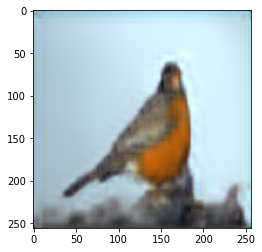

In [18]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

In [19]:
model.fit(img_array, img_array,
        epochs=1000,
        shuffle=True)

Epoch 1/1000
1/1 [==============================] - 0s 211ms/step - loss: 0.0034 - accuracy: 0.8955
Epoch 2/1000
1/1 [==============================] - 0s 211ms/step - loss: 0.0034 - accuracy: 0.8973
Epoch 3/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0035 - accuracy: 0.8949
Epoch 4/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0035 - accuracy: 0.8977
Epoch 5/1000
1/1 [==============================] - 0s 206ms/step - loss: 0.0035 - accuracy: 0.8944
Epoch 6/1000
1/1 [==============================] - 0s 219ms/step - loss: 0.0034 - accuracy: 0.8976
Epoch 7/1000
1/1 [==============================] - 0s 212ms/step - loss: 0.0034 - accuracy: 0.8958
Epoch 8/1000
1/1 [==============================] - 0s 211ms/step - loss: 0.0034 - accuracy: 0.8972
Epoch 9/1000
1/1 [==============================] - 0s 225ms/step - loss: 0.0034 - accuracy: 0.8968
Epoch 10/1000
1/1 [==============================] - 0s 207ms/step - loss: 0.0034 - accuracy: 0.8967

In [20]:
print("Neural network output")
pred = model.predict(img_array)

Neural network output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


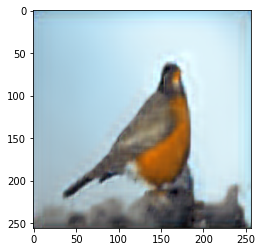

In [21]:
imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")